In [1]:
import pandas as pd

1) Aлгоритм Нидлмана-Вунша

In [2]:
def needleman_wunsch(seq1, seq2, match=1, mismatch=1, gap=1):
    n = len(seq1)
    m = len(seq2)
    
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    
    for i in range(n + 1):
        dp[i][0] = gap * i
    for j in range(m + 1):
        dp[0][j] = gap * j
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            dp[i][j] = max(dp[i - 1][j - 1] + score,
                           dp[i - 1][j] + gap,
                           dp[i][j - 1] + gap)
    
    return dp[n][m]

In [3]:
needleman_wunsch("TCAAGCA", "GCAAGA", match=1, mismatch=-1, gap=-2)

2

In [6]:
def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap=-2):
    n = len(seq1)
    m = len(seq2)
    
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    traceback = [[None] * (m + 1) for _ in range(n + 1)]
    
    for i in range(n + 1):
        dp[i][0] = gap * i
        traceback[i][0] = 'U'
    for j in range(m + 1):
        dp[0][j] = gap * j
        traceback[0][j] = 'L'
    
    traceback[0][0] = None
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            choices = {
                'D': dp[i - 1][j - 1] + score,  
                'U': dp[i - 1][j] + gap, 
                'L': dp[i][j - 1] + gap 
            }
            traceback[i][j], dp[i][j] = max(choices.items(), key=lambda x: x[1])
    
    aligned_seq1 = []
    aligned_seq2 = []
    
    i, j = n, m
    while i > 0 or j > 0:
        if traceback[i][j] == 'D':
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append(seq2[j - 1])
            i -= 1
            j -= 1
        elif traceback[i][j] == 'U':
            aligned_seq1.append(seq1[i - 1])
            aligned_seq2.append('-')
            i -= 1
        elif traceback[i][j] == 'L':
            aligned_seq1.append('-')
            aligned_seq2.append(seq2[j - 1])
            j -= 1
    
    return dp[n][m], ''.join(reversed(aligned_seq1)), ''.join(reversed(aligned_seq2))

seq1 = "TCAAGCA"
seq2 = "GCAAGA"
score, aligned1, aligned2 = needleman_wunsch(seq1, seq2)
print("Alignment Score:", score)
print("Sequence 1:", aligned1)
print("Sequence 2:", aligned2)

Alignment Score: 2
Sequence 1: TCAAGCA
Sequence 2: GCAAG-A


2) Алгоритм Смита-Вотермана

In [4]:
def smith_waterman(seq1, seq2, match=2, mismatch=-1, gap=-0.5):
    n = len(seq1)
    m = len(seq2)
    
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    max_score = 0
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            score = match if seq1[i - 1] == seq2[j - 1] else mismatch
            dp[i][j] = max(0,
                           dp[i - 1][j - 1] + score,
                           dp[i - 1][j] + gap,
                           dp[i][j - 1] + gap)
            max_score = max(max_score, dp[i][j])
    
    return max_score

In [5]:
smith_waterman("TCAAGCA", "GCAAGA", match=1, mismatch=-1, gap=-2)

4

Певый пункт с ручной матрицей!

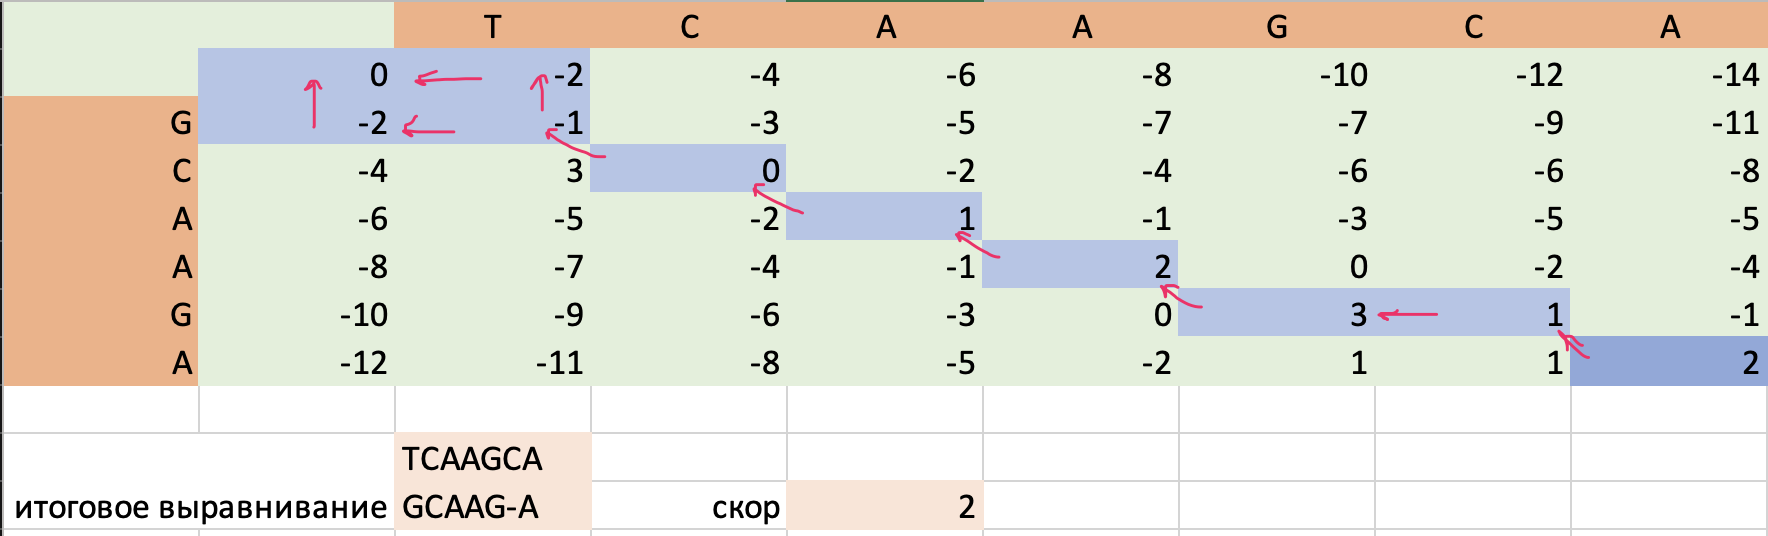